In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
#from mpl_toolkits.basemap import Basemap

In [2]:
DATA_FILE_0 = 'NYCTaxiTrips_Yr2015.csv'
DATA_FILE_1 = 'Uber_Clean.csv'
#Original = _0 
taxi_data_0 = pd.read_csv(DATA_FILE_0)
uber_data_0 = pd.read_csv(DATA_FILE_1)

In [3]:
taxi_data_0.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,pickup_zip,pickup_borough,pickup_neighborhood,dropoff_longitude,dropoff_latitude,dropoff_zip,dropoff_borough,dropoff_neighborhood,payment_type,fare_amount,tip_amount,total_amount
0,2,2015-01-06 11:39:29,2015-01-06 11:49:15,1,1.78,-73.999619,40.743599,10011,Manhattan,Chelsea and Clinton,-73.992203,40.764019,10036,Manhattan,Chelsea and Clinton,2,9.0,0.00,9.80
1,1,2015-01-13 09:18:29,2015-01-13 09:23:40,1,2.10,-73.981956,40.778290,10023,Manhattan,Upper West Side,-73.962173,40.805355,10024,Manhattan,Upper West Side,1,7.5,2.45,10.75
2,2,2015-01-16 07:15:44,2015-01-16 07:26:42,1,2.33,-73.991188,40.742226,10010,Manhattan,Gramercy Park and Murray Hill,-73.981613,40.768452,10019,Manhattan,Chelsea and Clinton,1,10.0,1.00,11.80
3,1,2015-01-23 11:56:05,2015-01-23 12:13:20,1,2.10,-73.959297,40.763336,10065,Manhattan,Upper East Side,-73.979996,40.781071,10023,Manhattan,Upper West Side,2,12.5,0.00,13.30
4,1,2015-01-24 10:11:48,2015-01-24 10:18:32,2,0.90,-73.971832,40.764751,10065,Manhattan,Upper East Side,-73.984047,40.764519,10019,Manhattan,Chelsea and Clinton,2,6.5,0.00,7.30


In [16]:
uber_data.head()

,Unnamed: 0,Date,Time,Month,Day,Year,locationID,borough,zone,service_zone,ntacode,pickup_neighborhood,DayOfWeek,HourOfDay
0,0,2015-05-17,1900-01-01 09:47:00,5,17,2015,141,Manhattan,Lenox Hill West,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,Sunday,9
1,1,2015-05-17,1900-01-01 09:47:00,5,17,2015,65,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,Sunday,9
2,2,2015-05-17,1900-01-01 09:47:00,5,17,2015,100,Manhattan,Garment District,Yellow Zone,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,Sunday,9
3,3,2015-05-17,1900-01-01 09:47:00,5,17,2015,80,Brooklyn,East Williamsburg,Boro Zone,BK90,East Williamsburg,Sunday,9
4,4,2015-05-17,1900-01-01 09:47:00,5,17,2015,90,Manhattan,Flatiron,Yellow Zone,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,Sunday,9


In [5]:
taxi_data = taxi_data_0
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format="%Y-%m-%d %H:%M:%S")
taxi_data['DayOfWeekNum'] = taxi_data['pickup_datetime'].dt.dayofweek
taxi_data['DayOfWeek'] = taxi_data['pickup_datetime'].dt.weekday_name
taxi_data['MonthDayNum'] = taxi_data['pickup_datetime'].dt.day
taxi_data['HourOfDay'] = taxi_data['pickup_datetime'].dt.hour
taxi_data['Month'] = taxi_data['pickup_datetime'].dt.month

In [17]:
uber_data = uber_data_0
uber_data['Date'] = pd.to_datetime(uber_data['Date'], format="%Y-%m-%d")
uber_data['Time'] = pd.to_datetime(uber_data['Time'], format="%H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date'].dt.dayofweek
uber_data['HourOfDay'] = uber_data['Time'].dt.hour
uber_data['DayOfWeek'] = uber_data['Date'].dt.weekday_name
uber_data

,Unnamed: 0,Date,Time,Month,Day,Year,locationID,borough,zone,service_zone,ntacode,pickup_neighborhood,DayOfWeek,HourOfDay,DayOfWeekNum
0,0,2015-05-17,1900-01-01 09:47:00,5,17,2015,141,Manhattan,Lenox Hill West,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,Sunday,9,6
1,1,2015-05-17,1900-01-01 09:47:00,5,17,2015,65,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,Sunday,9,6
2,2,2015-05-17,1900-01-01 09:47:00,5,17,2015,100,Manhattan,Garment District,Yellow Zone,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,Sunday,9,6
3,3,2015-05-17,1900-01-01 09:47:00,5,17,2015,80,Brooklyn,East Williamsburg,Boro Zone,BK90,East Williamsburg,Sunday,9,6
4,4,2015-05-17,1900-01-01 09:47:00,5,17,2015,90,Manhattan,Flatiron,Yellow Zone,MN13,Hudson Yards-Chelsea-Flat Iron-Union Square,Sunday,9,6
5,5,2015-05-17,1900-01-01 09:47:00,5,17,2015,228,Brooklyn,Sunset Park West,Boro Zone,BK32,Sunset Park West,Sunday,9,6
6,6,2015-05-17,1900-01-01 09:47:00,5,17,2015,7,Queens,Astoria,Boro Zone,QN70,Astoria,Sunday,9,6
7,7,2015-05-17,1900-01-01 09:47:00,5,17,2015,74,Manhattan,East Harlem North,Boro Zone,MN34,East Harlem North,Sunday,9,6
8,8,2015-05-17,1900-01-01 09:47:00,5,17,2015,249,Manhattan,West Village,Yellow Zone,MN23,West Village,Sunday,9,6
9,9,2015-05-17,1900-01-01 09:47:00,5,17,2015,22,Brooklyn,Bensonhurst West,Boro Zone,BK28,Bensonhurst West,Sunday,9,6


In [ ]:
taxi_monthdays = taxi_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='pickup_borough',
                                  aggfunc='count')
taxi_monthdays.plot(kind='bar', figsize=(8,6), color ="#1874CD", legend = None)
plt.ylabel('Total Journeys')
plt.xlabel("")
plt.title('Journeys by Day of Week (Taxi)');
#uber
uber_monthdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='borough',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6), color ="#66CDAA", legend = None)
plt.ylabel('Total Journeys')
plt.xlabel("")
plt.title('Journeys by Day of Week (Uber)');

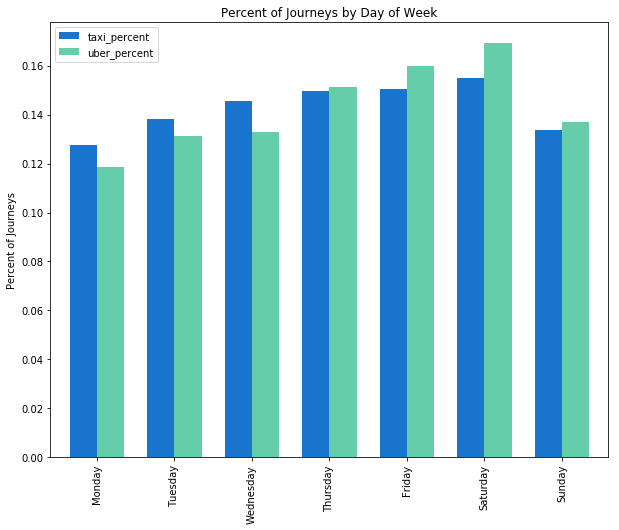

In [90]:
taxi_monthdays_2 = taxi_monthdays.reset_index()
taxi_monthdays_3 = taxi_monthdays
total = taxi_monthdays_2["pickup_borough"].sum()
taxi_monthdays_2["taxi_percent"] = taxi_monthdays_2["pickup_borough"]/total
taxi_monthdays_2
uber_monthdays_2 = uber_monthdays.reset_index()
taxi_monthdays_2["uber"] = uber_monthdays_2["borough"]
total_2 = taxi_monthdays_2["uber"].sum()
taxi_monthdays_2["uber_percent"] = taxi_monthdays_2["uber"]/total_2
taxi_monthdays_2
taxi_monthdays_2.plot(kind='bar',x="DayOfWeek",y=["taxi_percent","uber_percent"],width=.7,figsize=(10,8), color =["#1874CD","#66CDAA"], legend = None)
plt.ylabel('Percent of Journeys')
plt.xlabel('')
plt.title('Percent of Journeys by Day of Week')
plt.legend()

In [26]:
df_DayOfWeek = pd.DataFrame()

In [ ]:
taxi_monthdays = taxi_data.pivot_table(index=['MonthDayNum'],
                                  values='pickup_borough',
                                  aggfunc='count')
taxi_monthdays.plot(kind='bar', figsize=(8,6), color ="#1874CD", legend = None)
plt.ylabel('Total Journeys')
plt.xlabel("")
plt.title('Journeys by Date of Month');
uber_monthdays = uber_data.pivot_table(index=['Day'],
                                  values='borough',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar', figsize=(8,6),color ="#66CDAA", legend = None )
plt.ylabel('Total Journeys')
plt.xlabel("")
plt.title('Journeys by Date of Month');

In [112]:
uber_dateofmonth = uber_monthdays
uber_dateofmonth
total = uber_dateofmonth["borough"].sum()
uber_dateofmonth["uber_percent"]= uber_dateofmonth["borough"]/total
uber_dateofmonth

,borough,uber_percent
Day,,
1,462318,0.032411
2,444389,0.031154
3,449726,0.031529
4,411601,0.028856
5,439744,0.030829
6,459771,0.032233
7,471720,0.033070
8,438616,0.030750
9,447491,0.031372


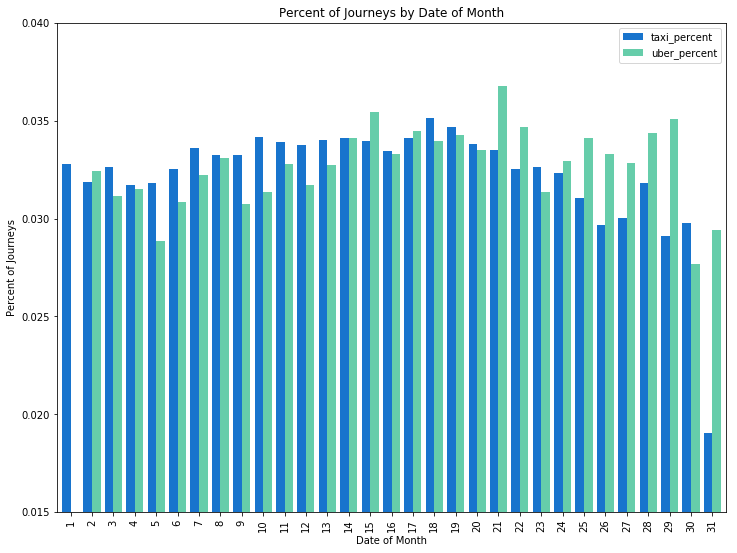

In [126]:
taxi_dateofmonth = taxi_monthdays
taxi_dateofmonth
total = taxi_dateofmonth["pickup_borough"].sum()
taxi_dateofmonth_2 = taxi_dateofmonth.reset_index()
taxi_dateofmonth_2["taxi_percent"]= taxi_dateofmonth_2["pickup_borough"]/total
taxi_dateofmonth_2
taxi_dateofmonth_2["uber_percent"] = uber_dateofmonth["uber_percent"]
taxi_dateofmonth_2
taxi_dateofmonth_2.plot(kind='bar',x="MonthDayNum",y=["taxi_percent","uber_percent"],width=.8,figsize=(12,9), color =["#1874CD","#66CDAA"], legend = None)
plt.ylabel('Percent of Journeys')
plt.xlabel('Date of Month')
plt.title('Percent of Journeys by Date of Month')
plt.ylim(.015,.04)
plt.legend()

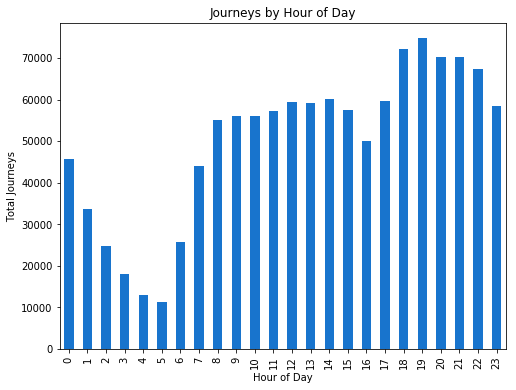

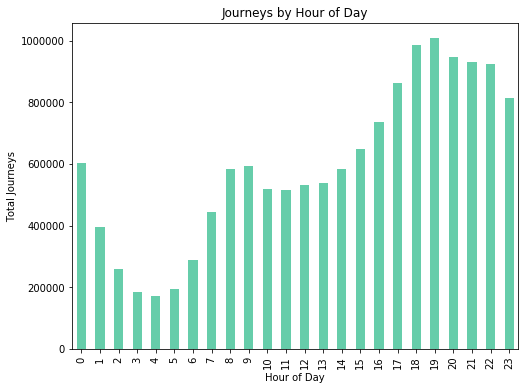

In [37]:
taxi_hour = taxi_data.pivot_table(index=['HourOfDay'],
                                  values='pickup_borough',
                                  aggfunc='count')
taxi_hour.plot(kind='bar', figsize=(8,6),color ="#1874CD", legend = None )
plt.ylabel('Total Journeys')
plt.xlabel('Hour of Day')
plt.title('Journeys by Hour of Day');
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='borough',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6), color ="#66CDAA", legend = None)
plt.ylabel('Total Journeys')
plt.xlabel('Hour of Day')
plt.title('Journeys by Hour of Day');

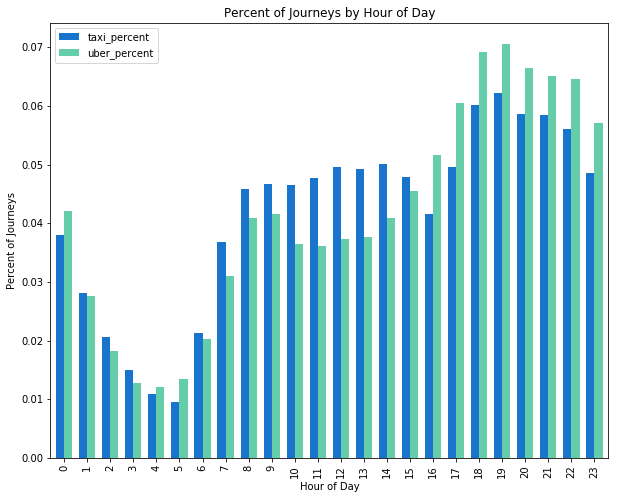

In [88]:
taxi_hour_2 = taxi_hour.reset_index()
taxi_hour_2
total = taxi_hour_2["pickup_borough"].sum()
taxi_hour_2["taxi_percent"] = taxi_hour_2["pickup_borough"]/total
taxi_hour_2
taxi_hour_2["uber"] = uber_hour["borough"]
total_2 = taxi_hour_2["uber"].sum()
taxi_hour_2["uber_percent"] = taxi_hour_2["uber"]/total_2
taxi_hour_2.plot(kind='bar',x="HourOfDay",y=["taxi_percent","uber_percent"],width=.7,figsize=(10,8), color =["#1874CD","#66CDAA"], legend = None)
plt.ylabel('Percent of Journeys')
plt.xlabel('Hour of Day')
plt.title('Percent of Journeys by Hour of Day')
plt.legend()